In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [26]:
breast_Cancer = sklearn.datasets.load_breast_cancer()

df = pd.DataFrame(breast_Cancer.data, columns=breast_Cancer.feature_names)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
df['target'] = breast_Cancer.target
df.tail()
df.shape

(569, 31)

In [28]:
df.info()
df.describe()
df.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

np.int64(0)

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [30]:
df['target'].value_counts() 
df.groupby('target').mean().T

target,0,1
mean radius,17.462830,12.146524
mean texture,21.604906,17.914762
mean perimeter,115.365377,78.075406
mean area,978.376415,462.790196
mean smoothness,0.102898,0.092478
mean compactness,0.145188,0.080085
mean concavity,0.160775,0.046058
mean concave points,0.087990,0.025717
mean symmetry,0.192909,0.174186
mean fractal dimension,0.062680,0.062867


In [31]:
x = df.drop('target', axis=1)
y = df['target']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  
print(x_test.shape)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

(114, 30)
(455, 30)
(455,)
(114,)


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [34]:
import sys, tensorflow as tf
print(sys.executable)
print(tf.__version__)


c:\Users\ABHI\OneDrive\Desktop\python\Deep_Learning_Project_YT\tf-env\Scripts\python.exe
2.20.0


In [35]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)


In [36]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

c:\Users\ABHI\OneDrive\Desktop\python\Deep_Learning_Project_YT\tf-env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [38]:
history = model.fit(x_train_sc, y_train, validation_split=0.2, epochs=20)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4588 - loss: 0.9864 - val_accuracy: 0.6154 - val_loss: 0.7202
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6099 - loss: 0.7013 - val_accuracy: 0.7802 - val_loss: 0.5051
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7527 - loss: 0.5226 - val_accuracy: 0.8242 - val_loss: 0.3776
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8462 - loss: 0.4107 - val_accuracy: 0.8901 - val_loss: 0.3045
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8929 - loss: 0.3394 - val_accuracy: 0.9231 - val_loss: 0.2595
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9066 - loss: 0.2913 - val_accuracy: 0.9341 - val_loss: 0.2296
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9203 - loss: 0.2569 - val_accuracy: 0.9560 - val_loss: 0.2082
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9203 - loss: 0.2306 - val_accuracy: 0.9560 - val

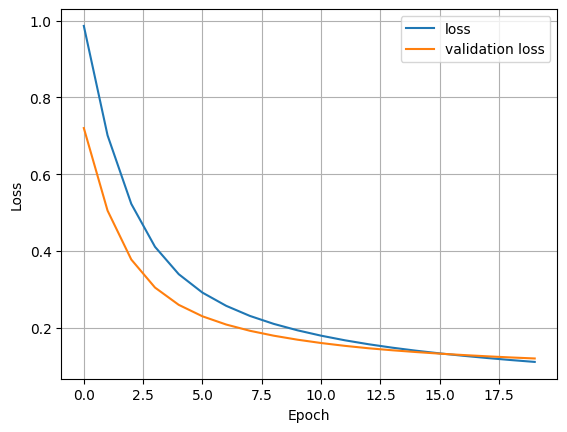

In [42]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss' , 'validation loss'], loc='upper right')
plt.grid()
plt.show()

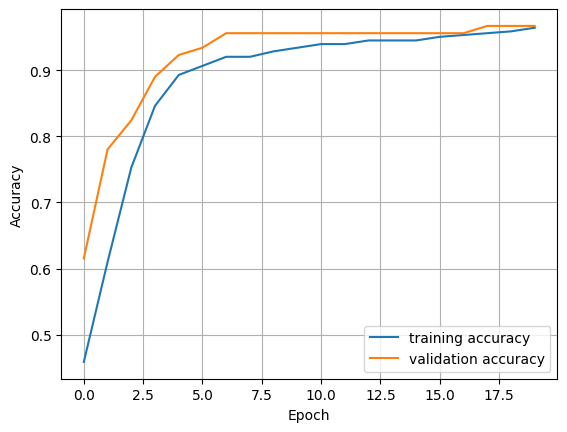

In [41]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['training accuracy', 'validation accuracy'],loc='lower right')
plt.grid()
plt.show()

In [43]:
loss,accuracy = model.evaluate(x_test_sc, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9649 - loss: 0.0910 
Loss: 0.09104353189468384
Accuracy: 0.9649122953414917


In [48]:
y_pred = model.predict(x_test_sc)
y_pred_label = [np.argmax(element) for element in y_pred]
print(y_pred_label)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
[np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0),

In [49]:
#Building the predictive system
input_data = (17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)
#changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the numpy array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
sc_data = scaler.transform(input_data_reshaped)
prediction = model.predict(sc_data)
print(prediction)
predicted_class = np.argmax(prediction, axis=1)
print(predicted_class)
if (predicted_class[0]==0):
    print("The breast cancer is Malignant")
else:
    print("The breast cancer is Benign")
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.9985804  0.27806875]]
[0]
The breast cancer is Malignant


c:\Users\ABHI\OneDrive\Desktop\python\Deep_Learning_Project_YT\tf-env\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
